## Generating data for Number of sessions per User

In [435]:
import scipy

In [436]:
random.seed(15)

user_session = stats.geom.rvs(size=4000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5



In [437]:
user_session.size,user_session.max(),user_session.min()

(4000, 12, 1)

In [438]:
user_session[:10],sum(user_session)

(array([2, 2, 5, 4, 2, 3, 1, 1, 3, 1]), 7985)

In [439]:
count_dict = {x : list(user_session).count(x) for x in user_session}
count_dict

{1: 2024,
 2: 955,
 3: 506,
 4: 262,
 5: 140,
 6: 61,
 7: 21,
 8: 17,
 9: 8,
 10: 4,
 12: 2}

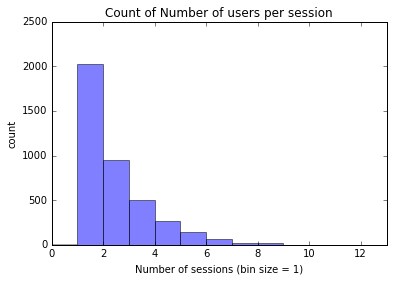

In [440]:
   #depicts number of users per number of sessions
    
bins = np.arange(0, 10, 1) # fixed bin size

plt.xlim([min(user_session)-1, max(user_session) +1])

plt.hist(user_session, bins=bins, alpha=0.5)
plt.title("Count of Number of users per session")
plt.xlabel('Number of sessions (bin size = 1)')
plt.ylabel('count')

plt.show()

In [274]:
import numpy as np

user_Id = range(1,4000)

In [275]:
userId_session = zip(user_Id,[10*i for i in user_session])

In [277]:
type(userId_session), userId_session[:5]

(list, [(1, 20), (2, 20), (3, 10), (4, 10), (5, 10)])

In [280]:
#Calculating total number of articles served in a day in all sessions (may be clicked or not)

sum1 = 0
for i in range(len(userId_session)):
    
    sum1 += userId_session[i][1]
    
sum1    

80060

In [281]:
UserIDs = []

for i in range(len(userId_session)):
    
    for j in range(userId_session[i][1]):
        UserIDs.append(userId_session[i][0])
            

In [282]:
len(UserIDs)   #matches with sum1 above

80060

In [142]:
UserIDs[:20]   # UserIds generated for all sessions the user opens

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [284]:
session_list = list(user_session)
session_list[:10]

[2, 2, 1, 1, 1, 4, 1, 3, 1, 6]

In [285]:
session_Id =[]

for i in session_list:
    
    for j in range(1,i+1):
#         print j
        session_Id.append([j for i in range(10)])
        
  

In [286]:
session_Id = np.array(session_Id).flatten()

In [287]:
session_Id.shape

(80090L,)

In [288]:
User_session = zip(UserIDs,session_Id )

In [289]:
len(User_session),type(User_session)

(80060, list)

In [290]:
import pandas as pd

df = pd.DataFrame(User_session, columns=['UserId', 'SessionId'])

In [291]:
df.tail(20)

,UserId,SessionId
80040,3999,1
80041,3999,1
80042,3999,1
80043,3999,1
80044,3999,1
80045,3999,1
80046,3999,1
80047,3999,1
80048,3999,1
80049,3999,1


In [441]:
Article_Id = range(4829)

In [442]:
Article_Id = Article_Id*(80060/4829)  

len(Article_Id)

77264

In [443]:
import random
for x in range(len(User_session)-len(Article_Id)):
    Article_Id.append(random.randint(1,4829))

In [444]:
len(Article_Id)

80060

In [445]:
from random import shuffle
shuffle(Article_Id)

In [446]:
df['ArticleId_served'] = Article_Id

In [447]:
df.tail()

,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent
80055,3999,2,1060,0,0
80056,3999,2,2088,1,10
80057,3999,2,4824,0,0
80058,3999,2,3272,0,0
80059,3999,2,2969,0,0


In [308]:
len(df)

80060

## Now, lets model number of clicks per session

In [309]:
from scipy import stats

random.seed(12)

clicks_per_session = stats.poisson.rvs(size=len(df)/10,  # Generate Poisson data
                                   mu=1 , loc = 1 )       # Average clicks per session = 2

# Print table of counts
print( pd.crosstab(index="counts", columns= clicks_per_session))


col_0      1     2     3    4    5   6  7
row_0                                    
counts  2905  3001  1433  516  125  23  3


In [311]:
clicks_per_session,len(clicks_per_session)

(array([1, 2, 2, ..., 2, 1, 2]), 8006)

In [448]:
clicked_or_not = []
random.seed(12)
for clicks in clicks_per_session:
    
    session_list = [0 for i in range(10-clicks)]
    
    for i in range(clicks):
        
        session_list.append(1)
        
    random.shuffle(session_list)
    clicked_or_not.append(session_list)
    

In [449]:
len(clicked_or_not)

8006

In [408]:
click = np.array(clicked_or_not).flatten()
click.shape,click.sum()                  #Converted into a binary array depicting clicks and No-click

((80060L,), 16054)

In [ ]:
# 16054 total articles clicked 

In [315]:
df['Click'] = click

In [409]:
df.head(10)

,UserId,SessionId,ArticleId_served,Click,time_spent
0,1,1,2034,0,0
1,1,1,2091,0,0
2,1,1,3375,0,0
3,1,1,1623,1,6
4,1,1,1711,0,0
5,1,1,3178,0,0
6,1,1,3661,0,0
7,1,1,3676,0,0
8,1,1,589,0,0
9,1,1,3310,0,0


In [410]:
from scipy.stats import chi
from scipy.stats import norm
import scipy
mycomps = (chi(2,3,8),norm(30, 9),norm(60,9),norm(90,8))
priors = [0.35,0.25,0.25,0.15]

In [411]:
def myMixture(x,priors,myComponents):
    s = 0
    for comp,prior in zip(myComponents,priors):
        s += comp.pdf(x)*prior
    return s

In [412]:
import numpy as np
x_data = np.linspace(0.0,100,1000)   #Generates 1000 numbers between 0 and 100

# x_data

In [413]:
y_data = myMixture(x_data,priors,mycomps)
y_data[:5]

array([  4.28410857e-05,   4.44564407e-05,   4.61269975e-05,
         4.78544092e-05,   4.96403698e-05])

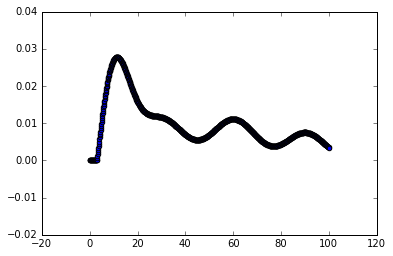

In [414]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_data,y_data)

In [415]:
def genSample(sample_size,priors,myComponents):
    myData = np.empty( shape=(0) )
    for comp,prior in zip(myComponents,priors):
        new_data = comp.rvs(int(sample_size*prior))
        myData = np.append(myData,new_data)
    return myData

In [416]:
data = genSample(16055,priors,mycomps)

len(data)

16053

In [417]:
print data[:10],data.min(),data.max()

for i in range(len(data)):
    if data[i]<0:
        data[i] *= -1



[ 16.09333317  30.56532548   8.14404468  13.84863196  14.26882068
   9.85033619   7.50014085  10.90797813   6.79028335   7.09216952] -5.80840333187 119.696160846


In [418]:
print min(data),len(data)
data = np.append(data,[10])
len(data)

0.237455621622 16053


16054

In [419]:
final_time = click

j=0
for i in range(len(click)):
    
    if click[i] == 1:
        final_time[i] = data[j]
        j +=1
        

In [420]:
len(final_time),final_time[:100]

(80060,
 array([ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,
         8,  0,  0,  0,  0, 13,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  9,  0,  7,  0,  0, 10,  6,  0,  7,  0,  0,  0,  0,  0, 14,
         0,  0,  0,  0,  0,  6, 19,  7,  0, 24,  9,  0,  0, 12,  0,  0, 12,
         0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14]))

In [432]:
df['Percentage Time Spent'] = final_time

df.head(10)

,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent
0,1,1,2034,0,0
1,1,1,2091,0,0
2,1,1,3375,0,0
3,1,1,1623,1,16
4,1,1,1711,0,0
5,1,1,3178,0,0
6,1,1,3661,0,0
7,1,1,3676,0,0
8,1,1,589,0,0
9,1,1,3310,0,0


In [434]:
df.to_csv("Generated_Click_Stream_Data.csv")